
# EDA + Visualización + Preprocesamiento

In [ ]:
'''
En este proyecto vamos a analizar el dataset de un seguro médico, este dataset contiene características de una persona y el precio que se le aplica

Vamos a realizar lo siguiente:

EDA: Explorar los datos
Data Cleaning: Limpiar los datos en blanco, así como detectar outliers y errores lógicos de información
Visualization
Pre-processing
'''

'\nEn este ejercicio vamos a analizar el dataset de un seguro médico, este dataset contiene características de una persona y el precio que se le aplica\n\nVamos a realizar lo siguiente:\n\nEDA: Explorar los datos\nData Cleaning: Limpiar los datos en blanco, así como detectar outliers y errores lógicos de información\nVisualization\nPre-processing\n¡Vamos a ello!\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#La libreria .preprocessing  es para transofromar datos, la labelEncoder para..., MinmaxSacaler lo que ahce es estandarizar datos
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

In [ ]:
df_seguro=pd.read_csv("/content/drive/MyDrive/Limpieza de Datos/dataset_seguros_sin_nulos.csv")

In [ ]:
'''1. ESTRUCTURA DE DATOS '''

'1. ESTRUCTURA DE DATOS '

In [ ]:
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              1338 non-null   int64  
 1   SEXO              1338 non-null   object 
 2   IMC               1338 non-null   float64
 3   PESO              1338 non-null   int64  
 4   HIJOS             1338 non-null   int64  
 5   CIUDAD            1338 non-null   object 
 6   PRECIO            1338 non-null   int64  
 7   INGRESO_SALARIAL  1338 non-null   object 
 8   FUMADOR           1338 non-null   bool   
 9   TIPO_COCHE        1338 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 95.5+ KB


In [ ]:
#Ahora vamos a ver lo que contiene mi dataset (vemos la tabla)
df_seguro.head()
#Destacar que la columna IMC es el indice de amsa corporal que depende de la altura y el peso de la persona.

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,FUMADOR,TIPO_COCHE
0,37,MASCULINO,29.830,80,2,BARCELONA,534,ALTO,False,AUDI
1,25,MASCULINO,26.220,71,0,BARCELONA,227,MEDIO,False,AUDI
2,52,FEMENINO,30.780,83,1,BARCELONA,900,ALTO,False,SIN COCHE
3,23,MASCULINO,23.845,64,0,BARCELONA,200,BAJO,False,TOYOTA
4,60,FEMENINO,36.005,97,0,BARCELONA,1102,MEDIO,False,AUDI


In [ ]:
#EL OBJETIVO DE MI DATASET ES PREDECIR PRECIO.
#VAMOS A ENTRENAR EL MODELO PARA QUE CON LOS DATOS COMO EL SEXO, LA EDAD, EL IMC EL PESO Y LOS HIJOS NOS AYUDEN A CREAR UN MODELO QUE PREDIGA EL PRECIO DEL SEGURO

In [ ]:
#con esto vemos si hay valores anomalos, valores numericos que puedan ser "raros"
df_seguro.describe()
#a nivel lógico no hay anda raro en estos datos

,EDAD,IMC,PESO,HIJOS,PRECIO
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.667231,82.444694,1.091928,1105.854260
std,14.049960,6.095439,16.389299,1.206345,1009.161649
min,18.000000,15.960000,43.000000,0.000000,93.000000
25%,27.000000,26.315000,71.000000,0.000000,395.250000
50%,39.000000,30.400000,82.000000,1.000000,781.500000
75%,51.000000,34.693750,93.000000,2.000000,1386.500000
max,64.000000,53.130000,143.000000,5.000000,5314.000000


In [ ]:
'''2. DETECCION DE NULOS'''

'2. DETECCION DE NULOS'

In [ ]:
df_seguro.isnull().sum()
#vemos que no hay nulos en mi tabla/Dataset

EDAD                0
SEXO                0
IMC                 0
PESO                0
HIJOS               0
CIUDAD              0
PRECIO              0
INGRESO_SALARIAL    0
FUMADOR             0
TIPO_COCHE          0
dtype: int64

In [ ]:
'''3. VERIFICAMOS FILAS REPETIDAS'''

'3. VERIFICAMOS FILAS REPETIDAS'

In [ ]:
#Aquí vamos a ver si hay valores repetidos
df_seguro[df_seguro.duplicated(keep=False)]
#vemos que solo me salen los nombres de las columnas pero no salen filas, por lo tanto entendemos que no hay duplicados.

,EDAD,SEXO,IMC,PESO,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,FUMADOR,TIPO_COCHE


In [ ]:
'''4. ANALISIS UNIVARIABLE'''

'4. ANALISIS UNIVARIABLE'

In [ ]:
#lo de la '\n' es para añadir saltos de lineas, entre los datos de cada columnas, para ver mejor los datos
for i in df_seguro.columns:
    print('\n',i,df_seguro[i].unique())


 EDAD [37 25 52 23 60 34 63 18 35 24 38 58 43 31 22 45 59 56 30 44 26 61 20 32
 42 40 47 27 41 36 64 28 53 33 29 50 55 49 54 46 57 48 39 21 62 51 19]

 SEXO ['MASCULINO' 'FEMENINO']

 IMC [29.83  26.22  30.78  23.845 36.005 31.92  23.085 26.315 36.67  26.6
 37.05  38.665 35.625 31.825 27.36  28.5   39.805 26.885 38.285 19.95
 25.46  30.115 32.205 28.595 23.75  31.35  28.785 26.505 22.04  22.42
 32.49  37.145 23.37  25.175 28.215 18.905 15.96  33.155 41.895 39.33
 28.88  27.74  41.23  33.25  31.635 22.135 28.975 17.29  25.365 24.32
 32.395 25.84  27.455 28.12  40.565 27.645 48.07  36.765 29.64  22.99
 27.55  22.61  34.865 32.775 37.335 40.945 34.105 36.385 35.72  32.3
 33.345 35.245 30.4   22.23  24.89  17.955 30.685 31.445 38.38  20.235
 17.195 30.59  27.265 31.73  16.815 29.45  38.095 25.935 31.065 25.08
 27.93  26.03  25.27  32.11  30.875 33.915 39.425 28.025 35.435 41.325
 33.44  32.68  36.86  34.295 23.465 35.91  21.85  33.725 26.98  19.
 33.535 22.705 38.19  26.41  31.54  32.015 

In [ ]:
'''5. SEPARAMOS NUESTRAS VARIABLES EN: TARGET, CATEGORICAS, BOOLEAN Y NUMERICAS'''

'5. SEPARAMOS NUESTRAS VARIABLES EN: TARGET, CATEGORICAS, BOOLEAN Y NUMERICAS'

In [ ]:
#Vemos en la fila 8 que para poner si son fumadores o no se usan booleanos, pero despues mi modelo lo interperetará como texto y lo que necesitamos es que todos los datos sean numeriocos.
#Podriamos hacer que True sea 1 y False sea 0
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              1338 non-null   int64  
 1   SEXO              1338 non-null   object 
 2   IMC               1338 non-null   float64
 3   PESO              1338 non-null   int64  
 4   HIJOS             1338 non-null   int64  
 5   CIUDAD            1338 non-null   object 
 6   PRECIO            1338 non-null   int64  
 7   INGRESO_SALARIAL  1338 non-null   object 
 8   FUMADOR           1338 non-null   bool   
 9   TIPO_COCHE        1338 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 95.5+ KB


In [ ]:
df_seguro2= df_seguro.copy()

In [ ]:

df_seguro2["FUMADOR_BOOL"]=df_seguro2["FUMADOR"].astype(int)

In [ ]:
#PAra no tener dos variables iguales borramos una de ellas. Porque nos interesa que en vez de tener True y False tener 1 y 0
del(df_seguro2["FUMADOR"])

In [ ]:
#Verificamos que la columna Fumador_bool ahora tenga valores enteros y no textos.
df_seguro2.info()
#Vemos que los valores ya son enteros/int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              1338 non-null   int64  
 1   SEXO              1338 non-null   object 
 2   IMC               1338 non-null   float64
 3   PESO              1338 non-null   int64  
 4   HIJOS             1338 non-null   int64  
 5   CIUDAD            1338 non-null   object 
 6   PRECIO            1338 non-null   int64  
 7   INGRESO_SALARIAL  1338 non-null   object 
 8   TIPO_COCHE        1338 non-null   object 
 9   FUMADOR_BOOL      1338 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 104.7+ KB


In [ ]:
#Ahora hacemos lo mimso de antes pero con la columna Sexo. Convertimos MAsculino/Femenino en 1 y 0
df_seguro2["SEXO_BOOL"]=np.where(df_seguro2["SEXO"]=="MASCULINO",0,1 )

In [ ]:
#Esto es solo para ver los datos que hay de cada uno. Cuantos femeninos hay y cuantos masculinos. Aquí el femenino es 1 y masculino es 0
df_seguro2["SEXO_BOOL"].value_counts()

SEXO_BOOL
0    678
1    660
Name: count, dtype: int64

In [ ]:
del(df_seguro2["SEXO"])

In [ ]:
#Vemos que ya se ha cambiado la columna SEXO por SEXO_BOO. Y con esto ya hemos hecho que todos los datos relevantes para predecir el PRECIO sean numericos.
df_seguro2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EDAD              1338 non-null   int64  
 1   IMC               1338 non-null   float64
 2   PESO              1338 non-null   int64  
 3   HIJOS             1338 non-null   int64  
 4   CIUDAD            1338 non-null   object 
 5   PRECIO            1338 non-null   int64  
 6   INGRESO_SALARIAL  1338 non-null   object 
 7   TIPO_COCHE        1338 non-null   object 
 8   FUMADOR_BOOL      1338 non-null   int64  
 9   SEXO_BOOL         1338 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 104.7+ KB


In [ ]:
#Ahora estamos haciendo una función para predecir la columna PRECIO. Esto lo explica desde las 19:07 a las 19:53. la explicación no es tan larga pero el profe ha querido resolverlo de diferentes maneras
target= ["PRECIO"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [ ]:
#TODA LA FUNCION DE ANTES ES PARA: cuando queramos hacer nuestro modelo ya no tengamos que estar especificando de que tipo son cada una de las columnas.
#Como podemos ver mas abajo, cuando queremos ver qué columnas son numéricas, ya nos lo dice directamente.

In [ ]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_seguro2)

In [ ]:
lista_categoricas

['CIUDAD', 'INGRESO_SALARIAL', 'TIPO_COCHE']

In [ ]:
lista_numericas


['EDAD', 'IMC', 'PESO', 'HIJOS']

In [ ]:
lista_boolean

['FUMADOR_BOOL', 'SEXO_BOOL']

In [ ]:
print(len(df_seguro2.columns), "total de variables")
print(len(target), "variable a predecir")
print(len(lista_categoricas), "variables categóricas")
print(len(lista_boolean), "variables boolean")
print(len(lista_numericas), "variables numéricas")

10 total de variables
1 variable a predecir
3 variables categóricas
2 variables boolean
4 variables numéricas


In [ ]:
'''6. LOGICA DE LAS VARIABLES'''

'6. LOGICA DE LAS VARIABLES'

[[<Axes: title={'center': 'EDAD'}>]]
[[<Axes: title={'center': 'IMC'}>]]
[[<Axes: title={'center': 'PESO'}>]]
[[<Axes: title={'center': 'HIJOS'}>]]


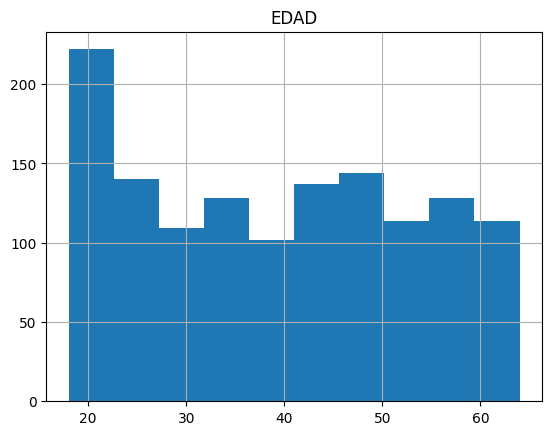

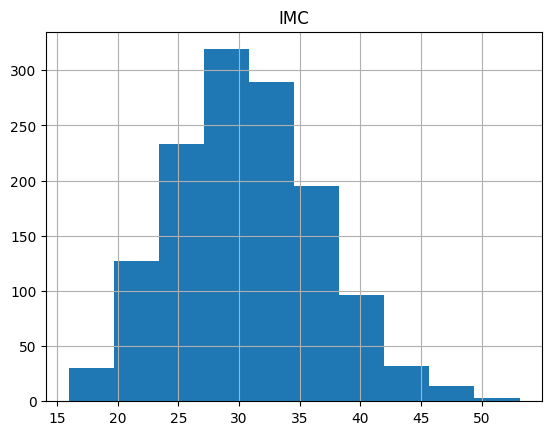

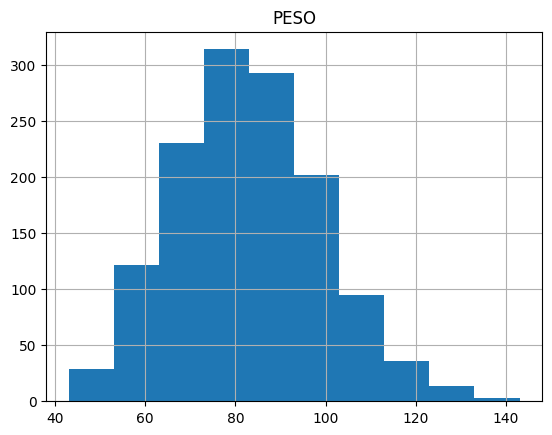

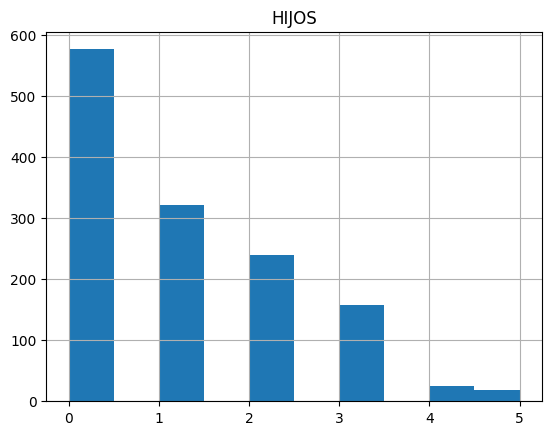

In [ ]:
for i in lista_numericas:
  print(df_seguro2.hist(i))

In [ ]:
for i in lista_categoricas:
  print(df_seguro2.value_counts(i))

CIUDAD
MADRID       364
SEVILLA      325
VALENCIA     325
BARCELONA    324
Name: count, dtype: int64
INGRESO_SALARIAL
MEDIO    540
ALTO     438
BAJO     360
Name: count, dtype: int64
TIPO_COCHE
AUDI         249
SIN COCHE    228
TOYOTA       228
FIAT         213
KIA          210
SEAT         210
Name: count, dtype: int64


In [ ]:
for i in lista_boolean:
  print(df_seguro2.value_counts(i))

FUMADOR_BOOL
0    1064
1     274
Name: count, dtype: int64
SEXO_BOOL
0    678
1    660
Name: count, dtype: int64


In [ ]:
df_seguro3=df_seguro2.copy()

In [ ]:
'''7. PREPROCESAMIENTO'''

'7. PREPROCESAMIENTO'

In [ ]:
'''7.1 CORRELACION: DETECTAR SI HAY varias VARIABLES QUE EXPLICAN LO MISMO'''


'7.1 CORRELACION: DETECTAR SI HAY varias VARIABLES QUE EXPLICAN LO MISMO'

In [ ]:
#Para ver si hay correlaciones hacemos esto:
#Lo que estamos haciendo es buscar correlaciones numericas
corr = df_seguro3.corr(numeric_only = True)


In [ ]:
#Con la funcion .style.background_gradient hacemos que aparezcan los colores de la tabla de abajo. Uno de los mas usados es el coolwarm. Hay mas pero hay que buscarlas en internet
corr.style.background_gradient(cmap='coolwarm')
#Mientars mas cercano al 1 mas correlacionado está una columna con otra. Y cuanto mas cercano sea el nº al -1 mas inversamente correlacionado está.


,EDAD,IMC,PESO,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL
EDAD,1.000000,0.107672,0.110553,0.041946,0.299007,-0.025019,0.020581
IMC,0.107672,1.000000,0.997731,0.011162,0.197734,0.003433,-0.048773
PESO,0.110553,0.997731,1.000000,0.013555,0.199860,0.005331,-0.048953
HIJOS,0.041946,0.011162,0.013555,1.000000,0.066241,0.008926,-0.018189
PRECIO,0.299007,0.197734,0.199860,0.066241,1.000000,0.787255,-0.057284
FUMADOR_BOOL,-0.025019,0.003433,0.005331,0.008926,0.787255,1.000000,-0.074670
SEXO_BOOL,0.020581,-0.048773,-0.048953,-0.018189,-0.057284,-0.074670,1.000000


In [ ]:
#hay una fuerte correlación entre el peso y el IMC, podemos eliminar cualquiera de las dos
#Los columnas con los valores mas cercanos al 1 o al -1 se pueden borrar. EN este caso la única mas cercana es el PESO
del(df_seguro3["PESO"])

In [ ]:
#Ya no está la columna PESO
df_seguro3.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1


In [ ]:
'''7.2 ANALISIS DEL TARGET'''

'7.2 ANALISIS DEL TARGET'

array([[<Axes: title={'center': 'PRECIO'}>]], dtype=object)

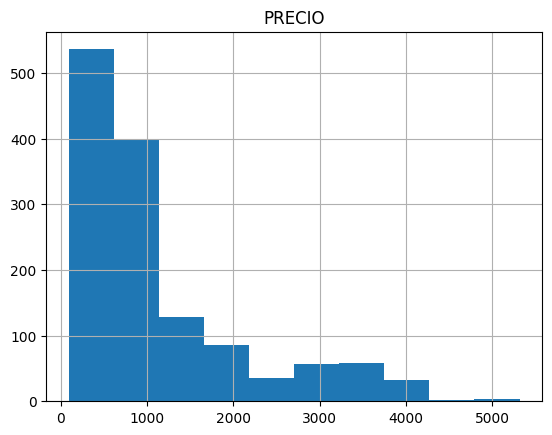

In [ ]:
#El eje y es la cantidad de clientes y el eje x es el precio
df_seguro3.hist("PRECIO")

<Axes: xlabel='PRECIO'>

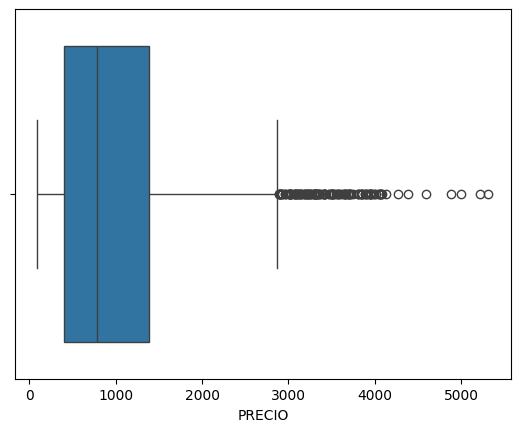

In [ ]:
sns.boxplot(x=df_seguro3["PRECIO"])

In [ ]:
#El precio está afectado por una distribución de skewed(es el grafico de antes que estaba casi todo a la izquierda y tenia una especie de cola hacia la derecha), se recomienda normalizarlo para que siga una distribución normal
df_seguro3["LOG_PRECIO"]=np.log10(df_seguro3["PRECIO"])


array([[<Axes: title={'center': 'LOG_PRECIO'}>]], dtype=object)

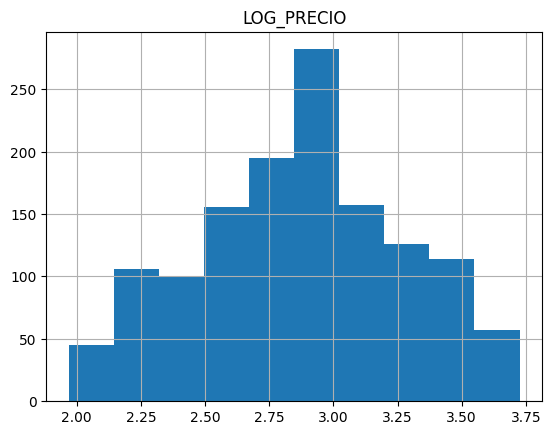

In [ ]:
df_seguro3.hist("LOG_PRECIO")
#Vemos que los valores siguen la distribución Normal, que es lo de la campana de gaus.
#NO SÉ PARA QUE SE USA EL LOGARITMO PERO SE SUPONE QUE ES PARA NUESTRO MODELO Y QUE NOS LO EXPLICARÁN DESPUES

<Axes: xlabel='LOG_PRECIO'>

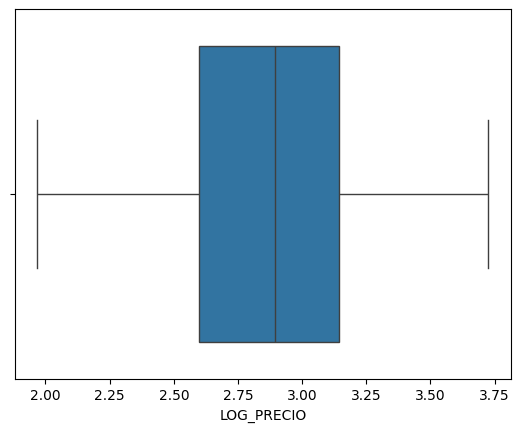

In [ ]:
sns.boxplot(x=df_seguro3["LOG_PRECIO"])
#Con este grafico vemos que todos los calores se encuentran en esa zona en azul. PEro esto es solo una forma de visualizar los datos.

In [ ]:
'''7.3 TARGET VS VARIABLES INDEPENDIENTES'''

'7.3 TARGET VS VARIABLES INDEPENDIENTES'

In [ ]:
df_seguro3.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0,2.727541
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0,2.356026
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1,2.954243
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0,2.301030
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1,3.042182


<ipython-input-52-8062cef15938>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="SEXO_BOOL",y="PRECIO", data=df_seguro3, palette="Wistia")


<Axes: xlabel='SEXO_BOOL', ylabel='PRECIO'>

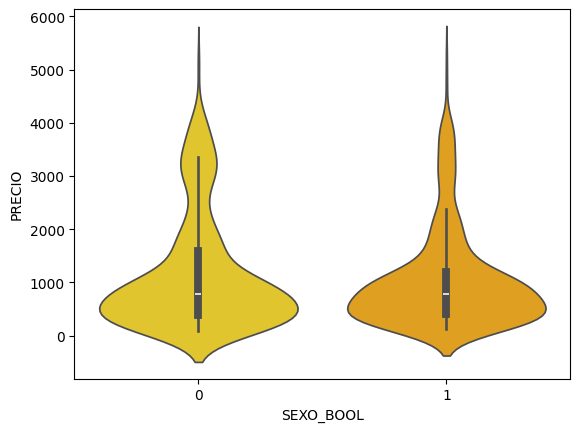

In [ ]:
#SEXO VS PRECIO
sns.violinplot(x="SEXO_BOOL",y="PRECIO", data=df_seguro3, palette="Wistia")
#REcordar que el 0 es masculino y el 1 es femenino
#Estamos viendo la correlacion entre el precio por ser masculino o femenino
#Los gráficos de barras son utiles cuando son pocas columans a comparar.

<ipython-input-53-1d3a6cdc2d45>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="FUMADOR_BOOL",y="PRECIO", data=df_seguro3, palette="magma")


<Axes: xlabel='FUMADOR_BOOL', ylabel='PRECIO'>

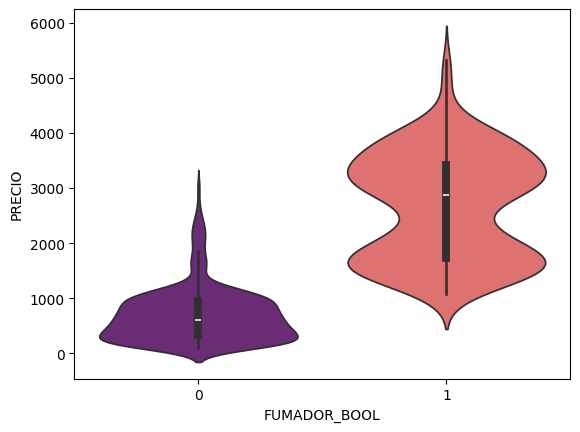

In [ ]:
#FUMADOR VS PRECIO
sns.violinplot(x="FUMADOR_BOOL",y="PRECIO", data=df_seguro3, palette="magma")

In [ ]:
#Se puede observar que sexo no altera el precio, sin embargo que sea fumador sí

<ipython-input-55-8432884ce2fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HIJOS",y="PRECIO",  data=df_seguro3, palette="coolwarm")


<Axes: xlabel='HIJOS', ylabel='PRECIO'>

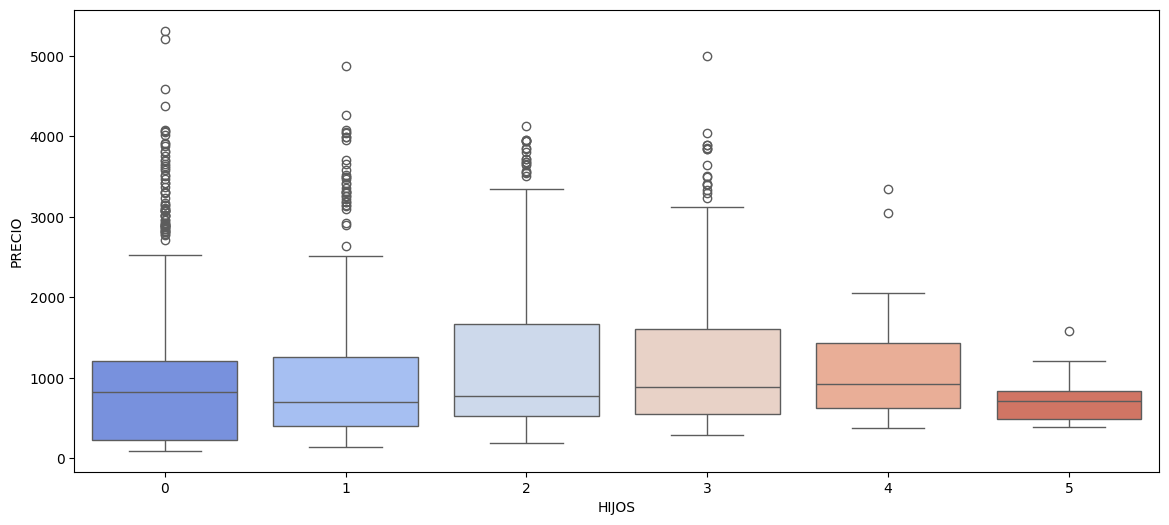

In [ ]:
#RELACION HIJOS VS PRECIO
plt.figure(figsize=(14,6))
sns.boxplot(x="HIJOS",y="PRECIO",  data=df_seguro3, palette="coolwarm")

<Axes: xlabel='EDAD', ylabel='PRECIO'>

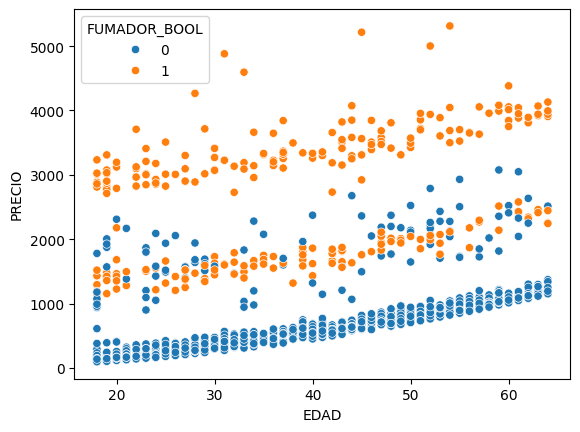

In [ ]:
#EDAD VS FUMADOR VS PRECIO
#Lo de hue es como darle otro "eje" a la tabla. Es lo de que las bolas tengan colores.
sns.scatterplot(x="EDAD", y="PRECIO", hue="FUMADOR_BOOL",data=df_seguro3)

<ipython-input-57-e90f4cac9641>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="CIUDAD",y="PRECIO", data=df_seguro3, palette="magma")


<Axes: xlabel='CIUDAD', ylabel='PRECIO'>

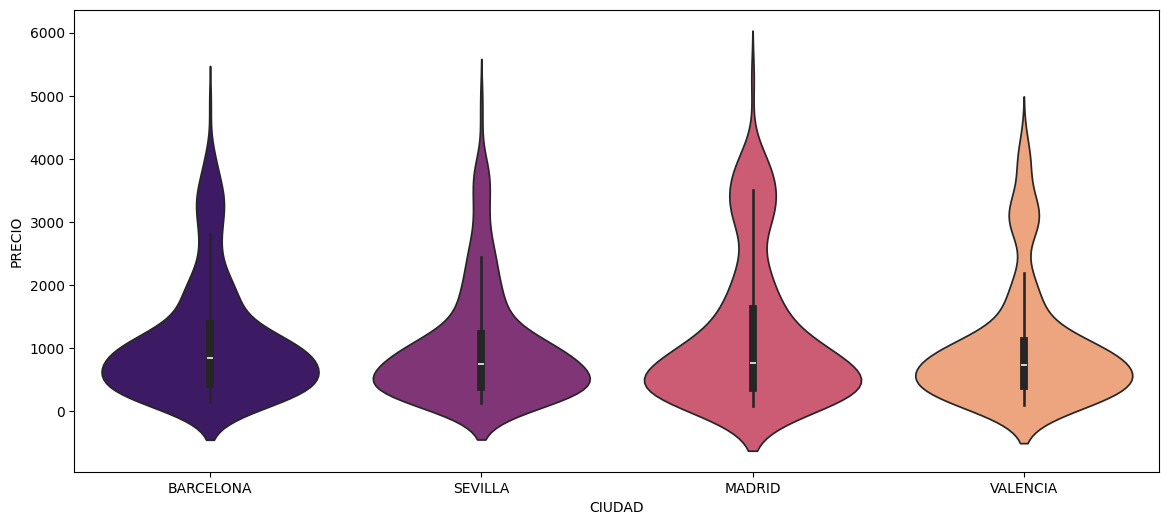

In [ ]:
#CIUDAD VS PRECIO
plt.figure(figsize=(14,6))
sns.violinplot(x="CIUDAD",y="PRECIO", data=df_seguro3, palette="magma")

In [ ]:
'''7.4 REESCALAR VARIABLES'''

'7.4 REESCALAR VARIABLES'

In [ ]:
'''
Nuestro objetivo es predecir el precio del seguro médico, vamos a utilizar las siguientes estrategias
Label Encoding (lo que hace es recorrer tu dataframe y al primero que ve le pone un 0, al segundo le pone un 1, al siguiente un 2...)(lo hace por ejemplo, en la columna de ciudad, si lo primero que ve es BArcelona le asigna un 0, si luego ve Madrid le asigna un 1...)
Ordinal Encoding (sirve apra ordenar valores)
One Hot Encoding
Min max scaling
'''
#ESTO LO EPLICA A APRTIR DE LAS 21:00
#Para entender lo que es Label Encoding, One Hot ENcoding... lo mejor es buscar una imagen en internet

'\nNuestro objetivo es predecir el precio del seguro médico, vamos a utilizar las siguientes estrategias\nLabel Encoding (lo que hace es recorrer tu dataframe y al primero que ve le pone un 0, al segundo le pone un 1, al siguiente un 2...)(lo hace por ejemplo, en la columna de ciudad, si lo primero que ve es BArcelona le asigna un 0, si luego ve Madrid le asigna un 1...)\nOrdinal Encoding (sirve apra ordenar valores)\nOne Hot Encoding\nMin max scaling\n'

In [ ]:
df_seguro3.dtypes

EDAD                  int64
IMC                 float64
HIJOS                 int64
CIUDAD               object
PRECIO                int64
INGRESO_SALARIAL     object
TIPO_COCHE           object
FUMADOR_BOOL          int64
SEXO_BOOL             int64
LOG_PRECIO          float64
dtype: object

In [ ]:
df_seguro3.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0,2.727541
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0,2.356026
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1,2.954243
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0,2.301030
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1,3.042182


In [ ]:
df_seguro4=df_seguro3.copy()

In [ ]:
target=["PRECIO","LOG_PRECIO"]

In [ ]:
lista_numericas2, lista_boolean2, lista_categoricas2= obtener_lista_variables(df_seguro4)

In [ ]:
lista_numericas2

['EDAD', 'IMC', 'HIJOS']

In [ ]:
lista_boolean2

['FUMADOR_BOOL', 'SEXO_BOOL']

In [ ]:
lista_categoricas2

['CIUDAD', 'INGRESO_SALARIAL', 'TIPO_COCHE']

In [ ]:
le = LabelEncoder()
df_seguro4['INGRESO_SALARIAL_INT']= le.fit_transform(df_seguro4['INGRESO_SALARIAL'])

In [ ]:
oe = OrdinalEncoder(categories=[['BAJO','MEDIO','ALTO']])

In [ ]:
oe

OrdinalEncoder(categories=[['BAJO', 'MEDIO', 'ALTO']])

In [ ]:
df_seguro4.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0,2.727541,0
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0,2.356026,2
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1,2.954243,0
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0,2.301030,1
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1,3.042182,2


In [ ]:
df_seguro4["INGRESO_SALARIAL_INT"]=oe.fit_transform(df_seguro4[['INGRESO_SALARIAL']])

In [ ]:
df_seguro4.head()

,EDAD,IMC,HIJOS,CIUDAD,PRECIO,INGRESO_SALARIAL,TIPO_COCHE,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT
0,37,29.830,2,BARCELONA,534,ALTO,AUDI,0,0,2.727541,2.0
1,25,26.220,0,BARCELONA,227,MEDIO,AUDI,0,0,2.356026,1.0
2,52,30.780,1,BARCELONA,900,ALTO,SIN COCHE,0,1,2.954243,2.0
3,23,23.845,0,BARCELONA,200,BAJO,TOYOTA,0,0,2.301030,0.0
4,60,36.005,0,BARCELONA,1102,MEDIO,AUDI,0,1,3.042182,1.0


In [ ]:
df_seguro4["INGRESO_SALARIAL"].value_counts()

INGRESO_SALARIAL
MEDIO    540
ALTO     438
BAJO     360
Name: count, dtype: int64

In [ ]:
lista_categoricas2

['CIUDAD', 'INGRESO_SALARIAL', 'TIPO_COCHE']

In [ ]:
#ingreso salarial ya lo tenemos a nivel numerico, tenemos que borrarlo de la lista y del dataframe
lista_categoricas2.remove("INGRESO_SALARIAL")

In [ ]:
lista_categoricas2

['CIUDAD', 'TIPO_COCHE']

In [ ]:
del(df_seguro4["INGRESO_SALARIAL"])

In [ ]:
#el .get_dummies es para hacer lo del One Hot Encoding. Lo del One Hot Encoding es pasar de una columna Ingreso_salarial y que en cada fila ponga Bajo, Medio y Alto  A poner columnas con Ingresos_bajos, Ingresos_Medios...
#Seguimos cambiando valores escritos por numeros. Por ejemplo: Si en una columna llamada Salario_bajo el valor es 0 significa que NO es bajo, si en la columna Salario_alto pone un 1 significa que SI que es alto y  que NO
df_seguro5=pd.get_dummies(data=df_seguro4, columns=lista_categoricas2)

In [ ]:
df_seguro5.head()

,EDAD,IMC,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
0,37,29.830,2,534,0,0,2.727541,2.0,True,False,False,False,True,False,False,False,False,False
1,25,26.220,0,227,0,0,2.356026,1.0,True,False,False,False,True,False,False,False,False,False
2,52,30.780,1,900,0,1,2.954243,2.0,True,False,False,False,False,False,False,False,True,False
3,23,23.845,0,200,0,0,2.301030,0.0,True,False,False,False,False,False,False,False,False,True
4,60,36.005,0,1102,0,1,3.042182,1.0,True,False,False,False,True,False,False,False,False,False


In [ ]:
#vemos que ahora si, todos mis valores de las columnas son valores numericos
df_seguro5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EDAD                  1338 non-null   int64  
 1   IMC                   1338 non-null   float64
 2   HIJOS                 1338 non-null   int64  
 3   PRECIO                1338 non-null   int64  
 4   FUMADOR_BOOL          1338 non-null   int64  
 5   SEXO_BOOL             1338 non-null   int64  
 6   LOG_PRECIO            1338 non-null   float64
 7   INGRESO_SALARIAL_INT  1338 non-null   float64
 8   CIUDAD_BARCELONA      1338 non-null   bool   
 9   CIUDAD_MADRID         1338 non-null   bool   
 10  CIUDAD_SEVILLA        1338 non-null   bool   
 11  CIUDAD_VALENCIA       1338 non-null   bool   
 12  TIPO_COCHE_AUDI       1338 non-null   bool   
 13  TIPO_COCHE_FIAT       1338 non-null   bool   
 14  TIPO_COCHE_KIA        1338 non-null   bool   
 15  TIPO_COCHE_SEAT      

In [ ]:
#AQUI YA ME HE PERDIDO
#Hay mas cosas que hicimos en clase despues de esto, pero todo esto de la tabla de colores de abajo en clase no lo hemos hecho, era otra cosa.

In [ ]:
corr = df_seguro5.corr(numeric_only=True)

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,EDAD,IMC,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
EDAD,1.000000,0.107672,0.041946,0.299007,-0.025019,0.020581,0.527839,-0.034009,0.002475,-0.011642,-0.000407,0.010016,-0.020585,-0.023868,-0.001094,-0.023038,0.012002,0.055877
IMC,0.107672,1.000000,0.011162,0.197734,0.003433,-0.048773,0.131753,-0.029758,-0.137105,0.269762,-0.136413,-0.006564,-0.050430,0.018777,-0.029598,0.001865,0.041254,0.019506
HIJOS,0.041946,0.011162,1.000000,0.066241,0.008926,-0.018189,0.159025,0.043323,-0.027177,-0.021534,0.026193,0.023302,0.047950,-0.039947,-0.007335,-0.022669,-0.013121,0.031386
PRECIO,0.299007,0.197734,0.066241,1.000000,0.787255,-0.057284,0.892961,-0.039010,0.006356,0.073979,-0.039910,-0.043210,-0.030941,0.006733,-0.030403,0.043423,0.014121,-0.001241
FUMADOR_BOOL,-0.025019,0.003433,0.008926,0.787255,1.000000,-0.074670,0.665503,-0.014365,0.002811,0.068498,-0.036945,-0.036945,-0.004716,0.027241,-0.030572,0.035618,-0.008328,-0.018179
SEXO_BOOL,0.020581,-0.048773,-0.018189,-0.057284,-0.074670,1.000000,-0.006242,-0.010629,-0.002864,-0.015290,0.012850,0.005878,0.027559,0.016069,0.001695,-0.043511,0.018025,-0.021734
LOG_PRECIO,0.527839,0.131753,0.159025,0.892961,0.665503,-0.006242,1.000000,-0.029511,0.043129,0.015820,-0.017855,-0.041645,-0.004750,0.001984,-0.045566,0.018693,0.005674,0.023310
INGRESO_SALARIAL_INT,-0.034009,-0.029758,0.043323,-0.039010,-0.014365,-0.010629,-0.029511,1.000000,-0.013339,-0.013565,-0.008931,0.036333,0.183252,-0.056815,-0.027327,-0.056676,-0.039472,-0.013659
CIUDAD_BARCELONA,0.002475,-0.137105,-0.027177,0.006356,0.002811,-0.002864,0.043129,-0.013339,1.000000,-0.345561,-0.320177,-0.320177,0.039019,-0.007527,0.043876,0.015098,-0.047380,-0.042740
CIUDAD_MADRID,-0.011642,0.269762,-0.021534,0.073979,0.068498,-0.015290,0.015820,-0.013565,-0.345561,1.000000,-0.346265,-0.346265,-0.042031,0.004838,-0.019068,0.031719,0.049015,-0.022454


In [ ]:
resultado_corr= df_seguro5.corr().unstack().sort_values(ascending = False)


In [ ]:
resultado_df= resultado_corr.to_frame().reset_index()

In [ ]:
print(resultado_df[(resultado_df['level_0']!=resultado_df['level_1'])].to_string())

                  level_0               level_1         0
18             LOG_PRECIO                PRECIO  0.892961
19                 PRECIO            LOG_PRECIO  0.892961
20           FUMADOR_BOOL                PRECIO  0.787255
21                 PRECIO          FUMADOR_BOOL  0.787255
22           FUMADOR_BOOL            LOG_PRECIO  0.665503
23             LOG_PRECIO          FUMADOR_BOOL  0.665503
24             LOG_PRECIO                  EDAD  0.527839
25                   EDAD            LOG_PRECIO  0.527839
26                   EDAD                PRECIO  0.299007
27                 PRECIO                  EDAD  0.299007
28          CIUDAD_MADRID                   IMC  0.269762
29                    IMC         CIUDAD_MADRID  0.269762
30                    IMC                PRECIO  0.197734
31                 PRECIO                   IMC  0.197734
32   INGRESO_SALARIAL_INT       TIPO_COCHE_AUDI  0.183252
33        TIPO_COCHE_AUDI  INGRESO_SALARIAL_INT  0.183252
34            

In [ ]:
df_seguro5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EDAD                  1338 non-null   int64  
 1   IMC                   1338 non-null   float64
 2   HIJOS                 1338 non-null   int64  
 3   PRECIO                1338 non-null   int64  
 4   FUMADOR_BOOL          1338 non-null   int64  
 5   SEXO_BOOL             1338 non-null   int64  
 6   LOG_PRECIO            1338 non-null   float64
 7   INGRESO_SALARIAL_INT  1338 non-null   float64
 8   CIUDAD_BARCELONA      1338 non-null   bool   
 9   CIUDAD_MADRID         1338 non-null   bool   
 10  CIUDAD_SEVILLA        1338 non-null   bool   
 11  CIUDAD_VALENCIA       1338 non-null   bool   
 12  TIPO_COCHE_AUDI       1338 non-null   bool   
 13  TIPO_COCHE_FIAT       1338 non-null   bool   
 14  TIPO_COCHE_KIA        1338 non-null   bool   
 15  TIPO_COCHE_SEAT      

In [ ]:
df_seguro5.head()

,EDAD,IMC,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
0,37,29.830,2,534,0,0,2.727541,2.0,True,False,False,False,True,False,False,False,False,False
1,25,26.220,0,227,0,0,2.356026,1.0,True,False,False,False,True,False,False,False,False,False
2,52,30.780,1,900,0,1,2.954243,2.0,True,False,False,False,False,False,False,False,True,False
3,23,23.845,0,200,0,0,2.301030,0.0,True,False,False,False,False,False,False,False,False,True
4,60,36.005,0,1102,0,1,3.042182,1.0,True,False,False,False,True,False,False,False,False,False


In [ ]:
df_seguro6= df_seguro5.copy()

In [ ]:
minMaxResultado=MinMaxScaler()

In [ ]:
lista_numericas2

['EDAD', 'IMC', 'HIJOS']

In [ ]:
df_seguro6[lista_numericas2]=minMaxResultado.fit_transform(df_seguro6[lista_numericas2])

In [ ]:
df_seguro6.head()

,EDAD,IMC,HIJOS,PRECIO,FUMADOR_BOOL,SEXO_BOOL,LOG_PRECIO,INGRESO_SALARIAL_INT,CIUDAD_BARCELONA,CIUDAD_MADRID,CIUDAD_SEVILLA,CIUDAD_VALENCIA,TIPO_COCHE_AUDI,TIPO_COCHE_FIAT,TIPO_COCHE_KIA,TIPO_COCHE_SEAT,TIPO_COCHE_SIN COCHE,TIPO_COCHE_TOYOTA
0,0.413043,0.373150,0.4,534,0,0,2.727541,2.0,True,False,False,False,True,False,False,False,False,False
1,0.152174,0.276029,0.0,227,0,0,2.356026,1.0,True,False,False,False,True,False,False,False,False,False
2,0.739130,0.398709,0.2,900,0,1,2.954243,2.0,True,False,False,False,False,False,False,False,True,False
3,0.108696,0.212133,0.0,200,0,0,2.301030,0.0,True,False,False,False,False,False,False,False,False,True
4,0.913043,0.539279,0.0,1102,0,1,3.042182,1.0,True,False,False,False,True,False,False,False,False,False


In [ ]:
df_seguro_final=df_seguro6.copy()


In [ ]:
pd.to_pickle(df_seguro_final,"/content/drive/MyDrive/Colab Notebooks/Clase 2 - Preprocesamiento/Datasets/df_seguro_final_PK")

OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive/Colab Notebooks/Clase 2 - Preprocesamiento/Datasets'

In [ ]:
df_recuperacion=pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/Clase 2 - Preprocesamiento/Datasets/df_seguro_final_PK")

In [ ]:
df_recuperacion.head()

In [ ]:
df_recuperacion.head()

In [ ]:
resultado_df=df_recuperacion.corr().unstack().sort_values(ascending = False)
print(resultado_df[(resultado_df['level_0']!=resultado_df['level_1'])].to_string())

In [ ]:
'''LISTO PARA APLICAR MODELOS DE MACHINE LEARNING :)'''